# Exploratory Data Analysis

**Mark Edward M. Gonzales, Lorene C. Uy, and Jacob Adrianne L. Sy (CSC713M)**<br>
mark_gonzales@dlsu.edu.ph, lorene_c_uy@dlsu.edu.ph, jacob_adrianne_l_sy@dlsu.edu.ph

In partial fulfillment of the requirements for the Machine Learning graduate class (CSC713M) under **Dr. Macario O. Cordel, II** of the Department of Computer Technology, College of Computer Studies, De La Salle University, this notebook details the process and presents the code for **exploratory data analysis** stage of the investigatory project titled "Automatic Recommendation of Distance Metric for $k$-Means Clustering: A Meta-Learning Approach."

<hr>

## PART I: Preliminaries

The following libraries and modules — all of which are automatically bundled with an Anaconda installation — were used in this notebook:

Library/Module | Description | License
:-- | :-- | :--
<a href = "https://pandas.pydata.org/">`pandas`</a> | Provides functions for data analysis and manipulation	 | BSD 3-Clause "New" or "Revised" License
<a href = "https://numpy.org/">`numpy`</a> | Provides a multidimensional array object, various derived objects, and an assortment of routines for fast operations on arrays | BSD 3-Clause "New" or "Revised" License
<a href = "https://scipy.org/">`scipy`</a> | Provides mathematical algorithms and convenience functions for manipulating and visualizing data | BSD 3-Clause "New" or "Revised" License

*The descriptions were lifted from their respective websites.*

In [3]:
import pandas as pd
import numpy as np

from scipy import stats

<hr>

# PART II: Data Analysis

Meta-features extracted from the consolidated 340 datasets were analyzed and investigated in order to summarize their characteristics. 

- The **number of observations**, **minimum**, **maximum**, **mean**, **variance**, **skewness**, and **kurtosis** of the meta-features were investigated.

- Histograms were used to represent the various meta-features across the datasets. These depict the distribution of each meta-feature for visual analysis.

In [4]:
df = pd.read_csv("dataset_labels/metafeatures.csv", encoding='latin-1', )
df.shape

(340, 54)

In [ ]:
# remove information that is not part of the metafeatures
del df['best_dist_metric_ari']
del df['best_dist_metric_dbs']

In [5]:
df

,attr_conc.mean,attr_conc.sd,attr_ent.mean,attr_ent.sd,attr_to_inst,can_cor.mean,can_cor.sd,cor.mean,cor.sd,cov.mean,...,one_itemset.quantiles.2,one_itemset.quantiles.3,one_itemset.quantiles.4,two_itemset.quantiles.0,two_itemset.quantiles.1,two_itemset.quantiles.2,two_itemset.quantiles.3,two_itemset.quantiles.4,best_dist_metric_ari,best_dist_metric_dbs
0,0.083137,0.074754,3.584954,2.680000e-06,0.010303,0.433018,0.253195,0.242233,0.228001,0.006188,...,0.083572,0.083572,0.084144,0.010303,0.147682,0.155695,0.161420,0.167716,manhattan,euclidean
1,0.037992,0.036260,3.584956,1.400000e-06,0.018359,0.217562,0.399361,0.125801,0.172071,0.000761,...,0.083190,0.083764,0.083764,0.027539,0.148021,0.153758,0.158921,0.167527,euclidean,standardized_euclidean
2,0.086459,0.064692,3.321917,4.570000e-16,0.014241,0.477469,0.210690,0.220614,0.217854,0.005883,...,0.099684,0.100475,0.100475,0.011076,0.172468,0.183544,0.193038,0.200949,euclidean,standardized_euclidean
3,0.046616,0.036637,3.321928,0.000000e+00,0.025397,-0.014967,0.440451,0.125810,0.176909,0.000887,...,0.100000,0.100000,0.100000,0.034921,0.173016,0.182540,0.190476,0.200000,euclidean,standardized_euclidean
4,0.101427,0.026079,3.584958,2.430000e-06,0.009815,0.316617,0.442044,0.272287,0.228004,0.008253,...,0.083424,0.083424,0.083969,0.002181,0.147219,0.157579,0.163577,0.167394,euclidean,standardized_euclidean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.023432,0.021466,3.444974,1.128371e-02,0.006879,0.369102,0.550237,0.199823,0.188264,0.003710,...,0.090056,0.097561,0.151970,0.081301,0.153221,0.164478,0.175735,0.249531,euclidean,euclidean
336,0.014634,0.017273,3.973324,2.244442e-02,0.002246,0.133160,0.283442,0.178266,0.189298,0.001608,...,0.062372,0.067630,0.109024,0.041854,0.107595,0.116987,0.125970,0.192119,euclidean,euclidean
337,0.080498,0.076914,2.320541,7.082206e-03,0.159794,0.492791,0.322741,0.314237,0.259968,0.009200,...,0.201031,0.201031,0.257732,0.010309,0.298969,0.319588,0.345361,0.412371,mahalanobis,standardized_euclidean
338,0.000976,0.006221,0.066647,1.487167e-01,1.581550,0.217634,0.305870,0.007252,0.029346,0.000010,...,0.067797,0.998055,0.999722,0.000000,0.006946,0.393998,0.993054,1.000000,euclidean,euclidean


In [10]:
df.columns.values

array(['attr_conc.mean', 'attr_conc.sd', 'attr_ent.mean', 'attr_ent.sd',
       'attr_to_inst', 'can_cor.mean', 'can_cor.sd', 'cor.mean', 'cor.sd',
       'cov.mean', 'cov.sd', 'eigenvalues.mean', 'eigenvalues.sd',
       'inst_to_attr', 'iq_range.mean', 'iq_range.sd', 'kurtosis.mean',
       'kurtosis.sd', 'mad.mean', 'mad.sd', 'mean.mean', 'mean.sd',
       'median.mean', 'median.sd', 'nr_attr', 'nr_bin', 'nr_cor_attr',
       'nr_inst', 'nr_outliers', 'sd.mean', 'sd.sd', 'skewness.mean',
       'skewness.sd', 'sparsity.mean', 'sparsity.sd', 't2', 't3', 't4',
       't_mean.mean', 't_mean.sd', 'var.mean', 'var.sd',
       'one_itemset.quantiles.0', 'one_itemset.quantiles.1',
       'one_itemset.quantiles.2', 'one_itemset.quantiles.3',
       'one_itemset.quantiles.4', 'two_itemset.quantiles.0',
       'two_itemset.quantiles.1', 'two_itemset.quantiles.2',
       'two_itemset.quantiles.3', 'two_itemset.quantiles.4',
       'best_dist_metric_ari', 'best_dist_metric_dbs'], dtype=object)

In [11]:
x = np.asarray(df)
stats.describe(x)

DescribeResult(nobs=255, minmax=(array([-6.45000000e-05,  9.76000000e-10,  1.18080000e-02,  0.00000000e+00,
        1.80000000e-05, -5.49441784e-01,  1.47000000e-05,  1.62000000e-17,
        1.62570610e-02,  1.63000000e-18,  2.52000000e-05,  5.92011000e-04,
        3.77587000e-04,  3.51050680e-01,  0.00000000e+00,  0.00000000e+00,
       -1.58390691e+00,  1.59654000e-04,  0.00000000e+00,  0.00000000e+00,
        2.16862400e-03,  1.24000000e-16,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.40000000e+01,
        0.00000000e+00,  2.20058100e-02,  4.62764000e-04, -1.80538081e+00,
        9.63000000e-16,  0.00000000e+00,  0.00000000e+00,  1.80000000e-05,
        1.80000000e-05,  3.22580650e-02,  0.00000000e+00,  0.00000000e+00,
        5.92011000e-04,  1.72858000e-04,  7.68295025e-05,  4.73709143e-04,
        1.85582822e-02,  1.98220859e-02,  2.85926476e-02,  0.00000000e+00,
        9.47418285e-04,  3.65521472e-02,  3.86809816e-02,  5.631157

C:\Users\Edward\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:182: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


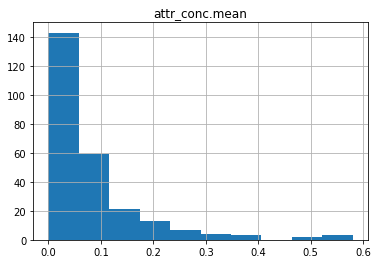

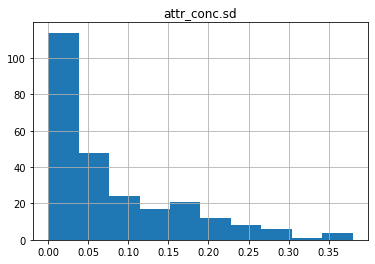

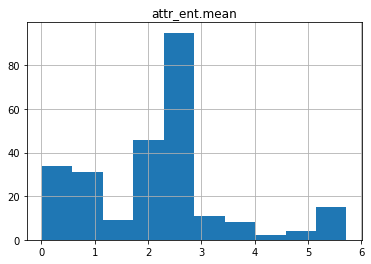

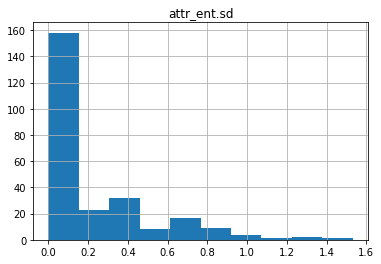

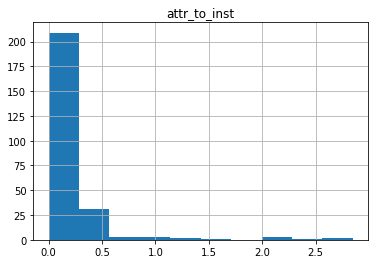

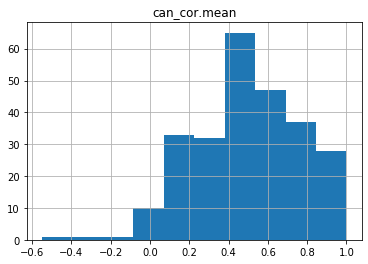

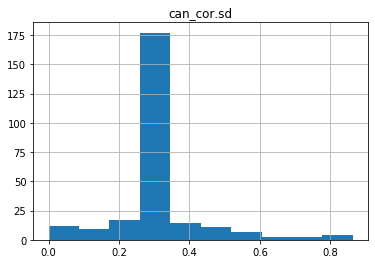

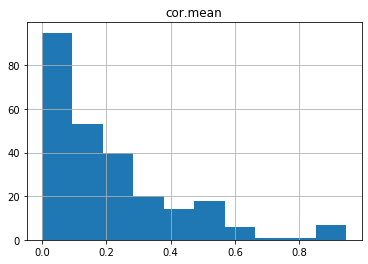

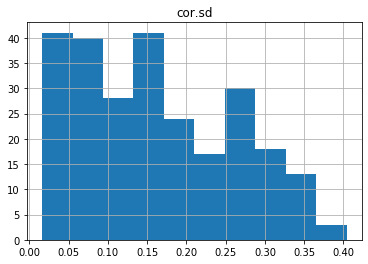

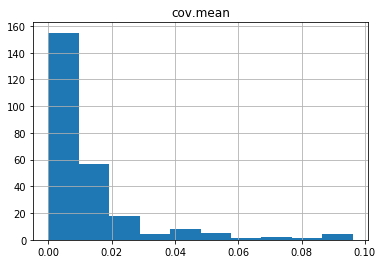

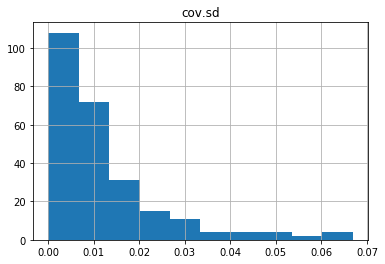

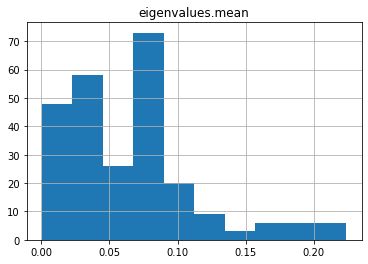

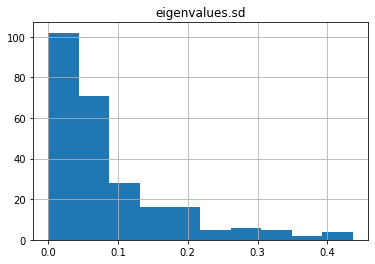

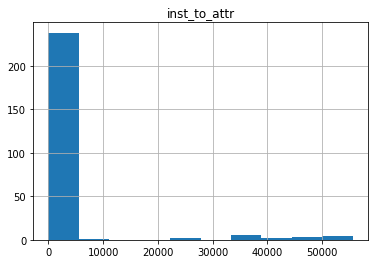

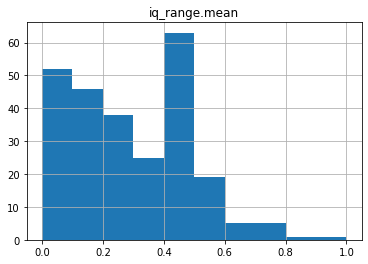

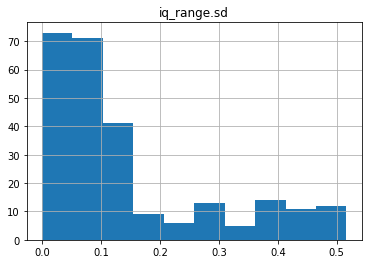

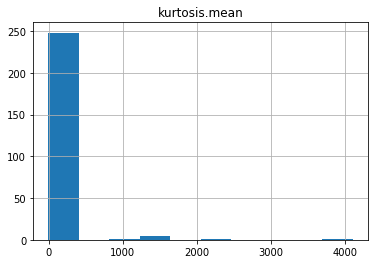

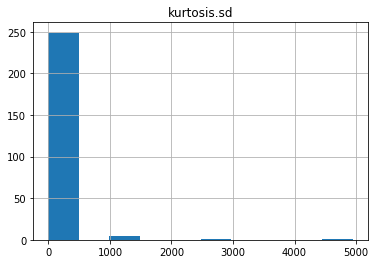

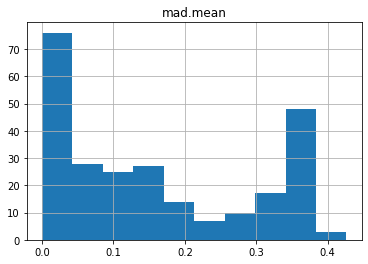

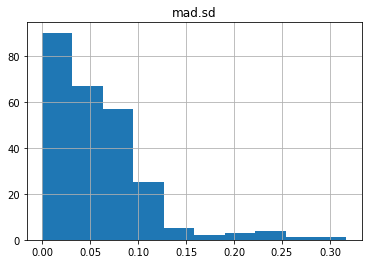

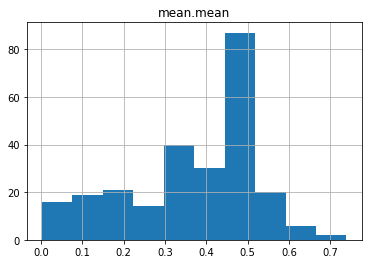

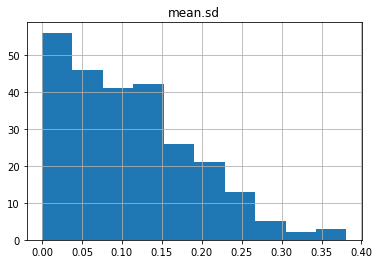

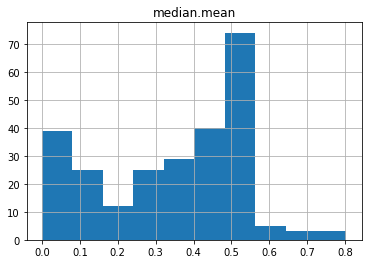

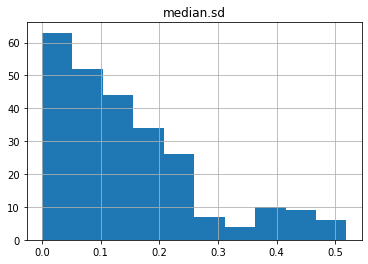

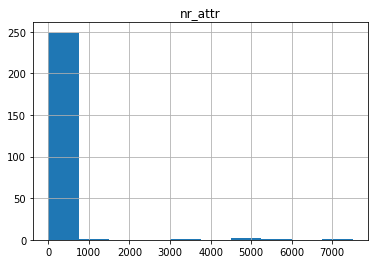

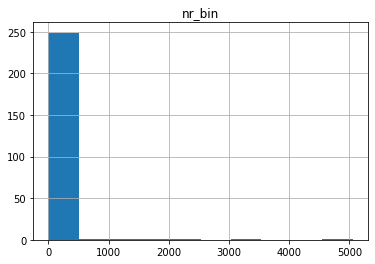

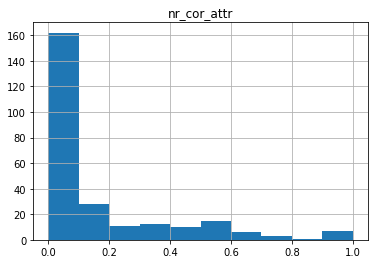

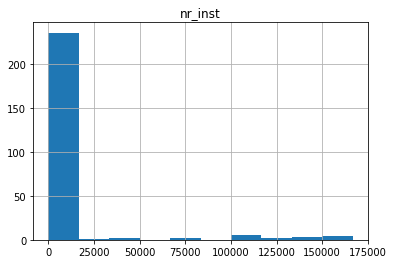

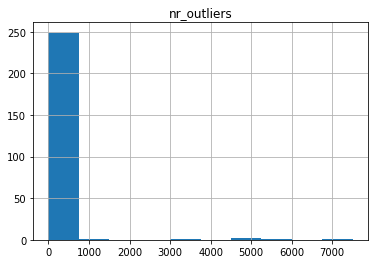

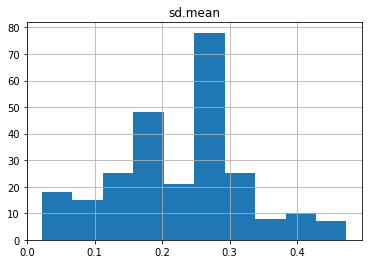

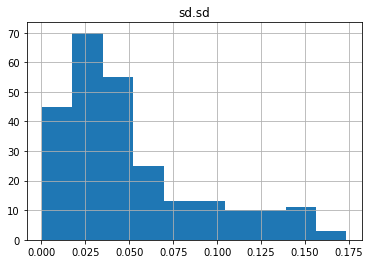

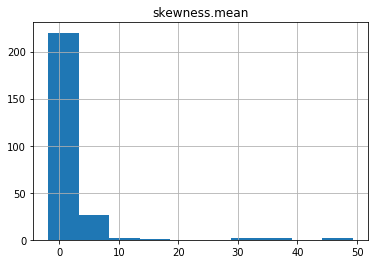

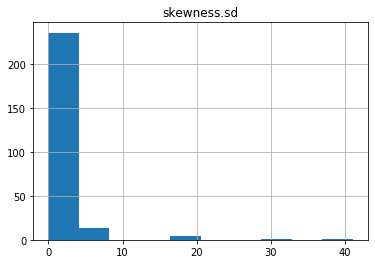

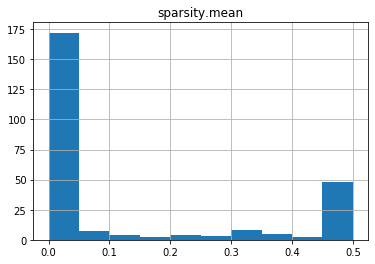

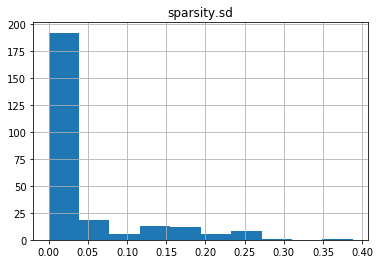

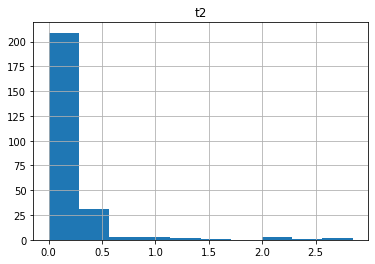

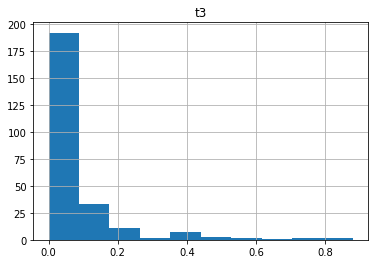

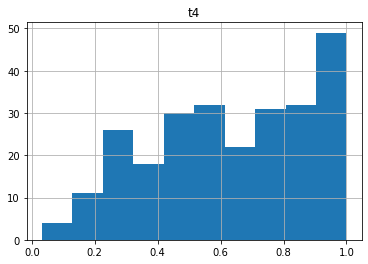

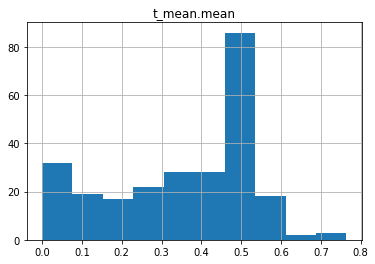

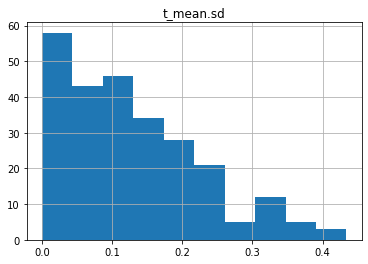

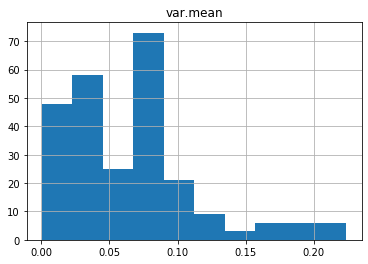

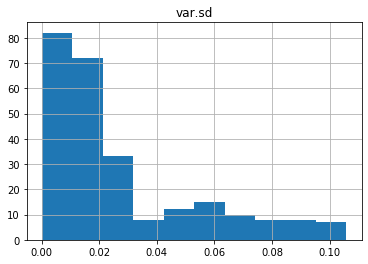

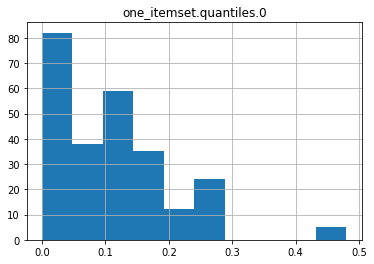

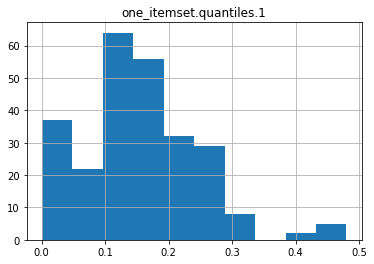

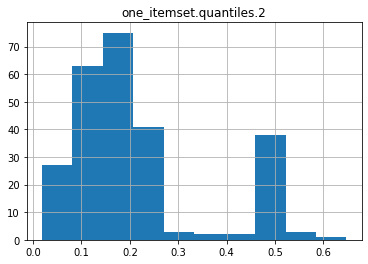

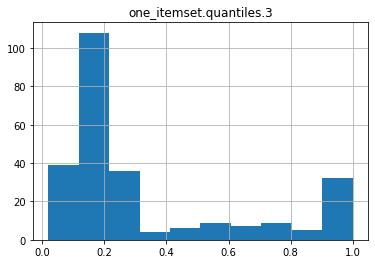

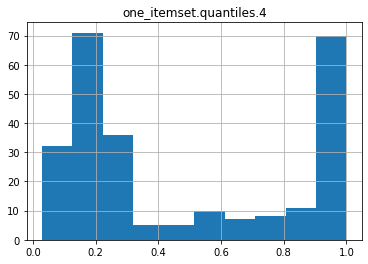

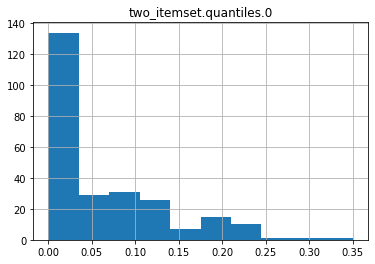

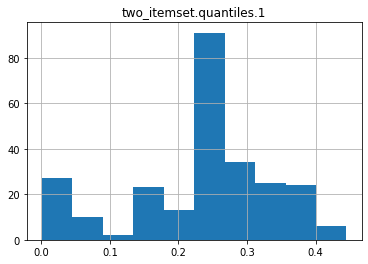

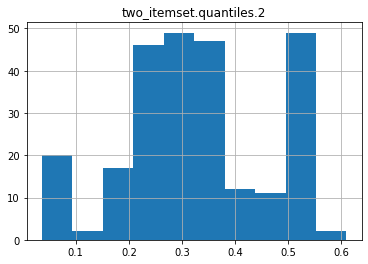

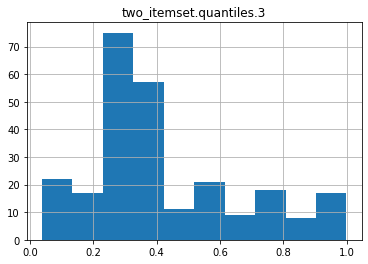

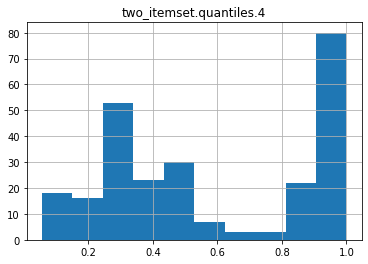

In [16]:
for col in df.columns.values:
    df.hist(column=col)